# Introduction to Support Vector Machines in Python

### Decision Boundaries

Suppose that we have a binary classification problem with two features. Then we can represent the instances as points in the plane. Some instances are **positive** and the rest are **negative**.

A **decision boundary** is a line that separates the positive instances from the negative instances. We use this line to classify new observations as positive or negative, depending on which side of the line they are on. The figure below shows an example of a decision boundary.

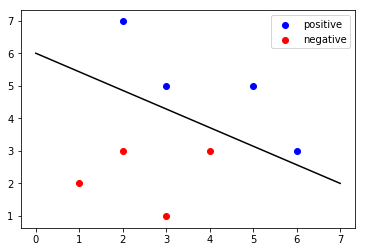

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter([2,3,5,6], [7,5,5,3], color='b', label='positive')
plt.scatter([1,3,2,4], [2,1,3,3], color='r', label='negative')

plt.plot([0,7], [6,2], color='k')
plt.legend()

### The Maximum Margin

There are many different lines that separate the two classes. What is the best line to pick?

The SVM algorithm finds the decision boundary with the largest **margin**. The margin is the shortest distance from the line to any data point. In effect, it finds the widest possible strip that separates the two classes. The points on the margins of the strip are called **support vectors**. In this example, there are three support vectors.

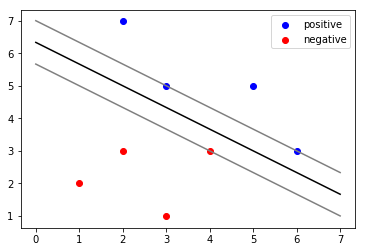

In [2]:
plt.scatter([2,3,5,6], [7,5,5,3], color='b', label='positive')
plt.scatter([1,3,2,4], [2,1,3,3], color='r', label='negative')

plt.plot([0,7], [7,7/3], color='grey')
plt.plot([0,7], [19/3,5/3], color='black')
plt.plot([0,7], [17/3,1], color='grey')
_ = plt.legend()

## Example: Iris dataset

In 1936, Ronald Fisher wrote an influential paper which used linear discriminant analysis to distinguish between three species of iris, based on measurements of the petals and sepals.

![Irises](http://articles.concreteinteractive.com/wp-content/uploads/2015/03/irises.png)
<img src="https://upload.wikimedia.org/wikipedia/commons/7/78/Petal-sepal.jpg" width="250">

If we plot the lengths and widths of the petals, then we can separate *Setosa* from the other two species with a straight line.

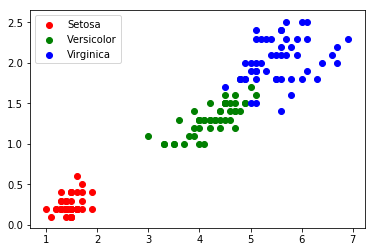

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
iris = load_iris()
data1 = pd.DataFrame(iris.data, columns=iris.feature_names)
X1 = data1[[2, 3]]
target1 = iris.target

setosa = X1[target1 == 0]
versicolor = X1[target1 == 1]
virginica = X1[target1 == 2]

plt.scatter(setosa[[0]], setosa[[1]], color='red', label='Setosa')
plt.scatter(versicolor[[0]], versicolor[[1]], color='green', label='Versicolor')
plt.scatter(virginica[[0]], virginica[[1]], color='blue', label='Virginica')
_ = plt.legend()

We use the SVM classifier to find a separating line with maximum margin. Note that there are two support vectors.

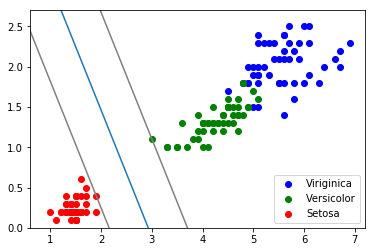

In [4]:
import numpy as np
from sklearn import svm
svc = svm.SVC(kernel='linear', C=np.inf).fit(X1, target1 > 0)

w1, w2 = svc.coef_[0]
b = svc.intercept_[0]
xs = np.array([0, 4])
ys = -(b + w1 * xs) / w2

plt.scatter(virginica[[0]], virginica[[1]], color='blue', label='Viriginica')
plt.scatter(versicolor[[0]], versicolor[[1]], color='green', label='Versicolor')
plt.scatter(setosa[[0]], setosa[[1]], color='red', label='Setosa')

plt.plot(xs, ys)
plt.plot(xs, ys + 1/w2, color='grey')
plt.plot(xs, ys - 1/w2, color='grey')
plt.ylim(0, 2.7)
plt.xlim(0.6, 7.2)
plt.legend()

## SVM with a soft margin

*Viriginica* and *Versicolor* cannot be separated perfectly by a straight line. But we can modify the SVM classifier by adding a penalty term for points on the wrong side of the margin. This penalty is controlled by the parameter $C$, which has a default value of 1. Previously, we set $C = \infty$, which enforced a hard margin.

C = 100


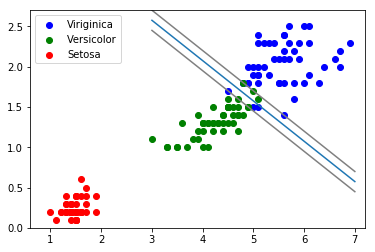

In [5]:
from ipywidgets import interact

def example(C):
    svc = svm.SVC(kernel='linear', C=C).fit(X1, target1 == 2)
                                        
    w1, w2 = svc.coef_[0]
    b = svc.intercept_[0]
    xs = np.array([3, 7])
    ys = -(b + w1 * xs) / w2

    plt.scatter(virginica[[0]], virginica[[1]], color='blue', label='Viriginica')
    plt.scatter(versicolor[[0]], versicolor[[1]], color='green', label='Versicolor')
    plt.scatter(setosa[[0]], setosa[[1]], color='red', label='Setosa')

    plt.plot(xs, ys)
    plt.plot(xs, ys + 1/w2, color='grey')
    plt.plot(xs, ys - 1/w2, color='grey')
    plt.ylim(0, 2.7)
    plt.xlim(0.6, 7.2)
    plt.legend()
    plt.show()

_ = interact(example, C=(1, 10))
print('C = 100')
example(100)

## SVM with kernels

A **kernel** is a transformation that is applied to the data points before applying the SVM classifier. This transformation allows us to find non-linear decision boundaries.

The most common kernels are:
* Linear kernel
* Polynomial kernels
* Radial basis functions

Let's use the radial basis function kernel to classify *Versicolor*. Note that we need a non-linear boundary because *Versicolor* lies between the other two species in the plot.


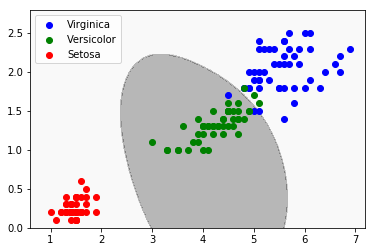

In [6]:
svc = svm.SVC(kernel='rbf', C=5).fit(X1, target1 != 1)

# create a mesh to plot in
xx, yy = np.meshgrid(np.arange(0.6, 7.2, 0.01),
                     np.arange(0, 2.8, 0.01))

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.gray, alpha=0.3)
plt.scatter(virginica[[0]], virginica[[1]], color='blue', label='Virginica')
plt.scatter(versicolor[[0]], versicolor[[1]], color='green', label='Versicolor')
plt.scatter(setosa[[0]], setosa[[1]], color='red', label='Setosa')
_ = plt.legend()


### A remark on non-binary classification

As described, the SVM classifier is **binary** -- it separates observations into two classes. There are two ways to extend it to three or more classes:

1. **One-vs-rest**: For each class *C*, train a classifier to distinguish *C* from not-*C*. Obtain a confidence score from each classifier, and choose the class with the highest confidence score.
2. **One-vs-one**. For each pair of classes *C* and *C'*, train a classifier to distinguish between *C* and *C'*. All of the classifiers vote on new observations, and the class that receives the most votes wins.

The SVM classifier in scikit-learn can use either method, but it uses "one-vs-one" by default.


## Example: ZIP code digits

We will use an SVM classifier to identify handwritten digits. The training set contains 7921 observations.
Each digits is a $16 \times 16$ image with 256 grayscale values. This is a very difficult problem. An expert can achieve 97.5% accuracy or better, but our naive attempt will be only 95% accurate.

### Download the datasets

In [7]:
import os.path
import urllib.request

if not os.path.isfile('zip.train.gz'):
    urllib.request.urlretrieve(
        'http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/zip.train.gz',
        'zip.train.gz')

if not os.path.isfile('zip.test.gz'):
    urllib.request.urlretrieve(
        'http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/zip.test.gz',
        'zip.test.gz')

### Load the training set

In [8]:
import numpy as np
import pandas as pd
import gzip

with gzip.open('zip.train.gz', 'rb') as f:
    train = pd.read_csv(f, sep=' ', header=None)
    target2 = train[0].astype(int)
    train = train[list(range(1, 257))]

### Examine the data

Here are some examples of handwritten 3's from the training data. It is easy to see how they could be mistaken for other digits.

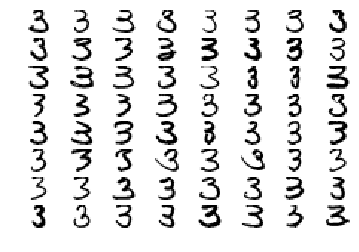

In [9]:
figure = plt.figure()
threes = train.loc[target2 == 3]
for i in range(64):
    ax = figure.add_subplot(8, 8, i+1)
    plt.axis('off')
    mat = -np.array(threes.iloc[i]).reshape(16, 16)
    ax.imshow(mat, cmap=plt.get_cmap('gray'))

### Training

We train an SVM model, using the radial basis function kernel. Our model has 99.9% accuracy in sample, but the real question is how accurate it is on the test set.

In [10]:
C = 10
svc = svm.SVC(kernel='rbf', C=C).fit(train, target2)
predict2 = svc.predict(train)
np.mean(predict2==target2)

0.99917706761761071

### Load the test set

In [11]:
with gzip.open('zip.test.gz', 'rb') as f:
    test = pd.read_csv(f, sep=' ', header=None)
    target3 = test[0].astype(int)
    test = test[list(range(1, 257))]

### Evaluate the model on the test set

In [12]:
from sklearn.metrics import confusion_matrix

predict3 = svc.predict(test)
print('Accuracy = %f\n' % np.mean(predict3==target3))
confusion = pd.DataFrame(confusion_matrix(target3, predict3, labels=list(range(10))))
confusion.index.name = 'Target'
confusion.columns.name = 'Prediction'
confusion

Accuracy = 0.950174



Prediction,0,1,2,3,4,5,6,7,8,9
Target,,,,,,,,,,
0,354,0,2,0,1,0,1,0,1,0
1,0,257,0,1,3,0,3,0,0,0
2,2,0,185,2,2,3,0,1,3,0
3,2,0,2,149,0,9,0,0,4,0
4,0,1,4,0,186,1,2,1,1,4
5,3,0,0,4,1,148,0,0,2,2
6,0,0,2,0,3,1,164,0,0,0
7,0,0,1,0,6,1,0,137,0,2
8,3,0,1,2,1,1,1,0,156,1
